In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from census import Census
from config import  gkey
import gmaps
import time
from us import states
import json
import scipy.stats as stats

In [3]:
combined_data = pd.read_csv("Census_Zillow_Combined_CA.csv")
combined_data.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249


# Get City Loaction via OpenWeather API 

In [4]:
api_key = "288538c4c4aa958caf000f4ac70ef2f0"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

combined_data["Latitude"] = ""
combined_data["Longitude"] = ""
combined_data["Temp"] = ""

for index, row in combined_data.iterrows():
    city = row["City"]+",us"
    response = requests.get(url + city).json()
    
    try:
        combined_data.loc[index, "Latitude"] = response["coord"]["lat"]
        combined_data.loc[index, "Longitude"] = response["coord"]["lon"]
        combined_data.loc[index, "Temp"] = response["main"]["temp"]
        
    except:
        pass
    
combined_data.head()

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Latitude,Longitude,Temp
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413,33.97,-118.25,82.02
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911,34.05,-118.24,82.62
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700,34.05,-118.24,82.62
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954,34.05,-118.24,82.62
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249,34.05,-118.24,82.62


In [5]:
# limited the lat and lng within California  "min_lat": 32.5121,"max_lat": 42.0126,"min_lng": -124.6509,"max_lng": -114.1315
combined_data = combined_data[combined_data["Latitude"] != ""]
combined_data = combined_data[combined_data["Latitude"] <= 42.0126]
combined_data = combined_data[combined_data["Latitude"] >= 32.5121]
combined_data = combined_data[combined_data["Longitude"] <= -114.1315]
combined_data = combined_data[combined_data["Longitude"] >= -124.6509]
#csv
combined_data.to_csv("Combined_loc_CA.csv",index = False)
print(combined_data.count())
combined_data.head()

Zipcode                          1067
City                             1067
State                            1067
CountyName                       1067
Population                       1067
Median Age                       1067
Household Income                 1067
Per Capita Income                1067
Poverty Count                    1067
Poverty Rate                     1067
average rent                     1067
Median Home Value                1067
Number of House Build in year    1067
Avg_HomeValue                    1067
Employment Rate                  1067
Latitude                         1067
Longitude                        1067
Temp                             1067
dtype: int64


,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Latitude,Longitude,Temp
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413,33.97,-118.25,82.02
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911,34.05,-118.24,82.62
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700,34.05,-118.24,82.62
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954,34.05,-118.24,82.62
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249,34.05,-118.24,82.62


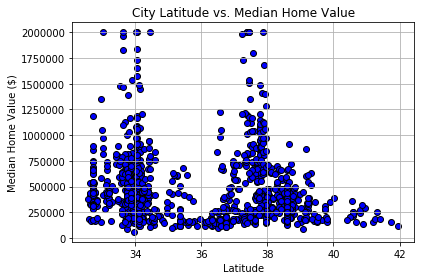

In [6]:
plt.scatter(combined_data["Latitude"], combined_data["Median Home Value"], marker="o", facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()
# save figure
plt.savefig("City Latitude vs. Median Home Value.png")
#show figure 
plt.show()

In [7]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_data["Latitude"], combined_data["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between latitude and home value, but not strong corelation.")

P-value is 0.00235008492688056, which shows there is correlation between latitude and home value, but not strong corelation.


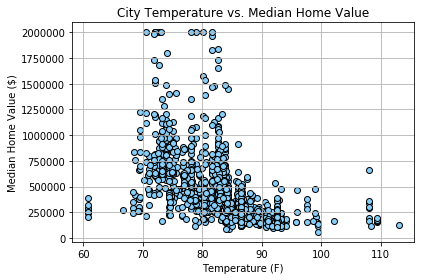

In [8]:
plt.scatter(combined_data["Temp"], combined_data["Median Home Value"], marker="o", facecolor="lightskyblue", edgecolor="black")
plt.title("City Temperature vs. Median Home Value")
plt.ylabel("Median Home Value ($)")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.tight_layout()
# save figure
plt.savefig("City Temperature vs. Median Home Value.png")
#show figure 
plt.show()

In [9]:
#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
pvalue = stats.pearsonr(combined_data["Temp"], combined_data["Median Home Value"])[1]
print(f"P-value is {pvalue}, which shows there is correlation between temperature and home value.")

P-value is 7.008860587709915e-61, which shows there is correlation between temperature and home value.


# Search Whole Foods Market Locations

In [12]:
#create list for whole foods locations
lat_list=[]
lng_list=[]
name_list=[]
address_list=[]
counter =0
#covert city location to a list
locations = combined_data[["Latitude", "Longitude"]].astype(float)
locations_list = locations.values

# geocoordinates
for location in locations_list:
    target_search = "Whole Foods Market"
    target_radius = 8000
    target_type = "grocery"
    target_coordinates = str(location[0]) +","+str(location[1])
# set up a parameters dictionary
    params = {
        "location": target_coordinates,
        "keyword": target_search,
        "radius": target_radius,
        "type": target_type,
        "key": gkey
    }

# base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
    response = requests.get(base_url, params=params)
# convert response to json
    places_data = response.json()
    counter+=1
    try:
        for x in range(len(places_data["results"])):
            name = places_data["results"][x]["name"]
            lat =places_data["results"][x]["geometry"]["location"]["lat"]
            lng =places_data["results"][x]["geometry"]["location"]["lng"]
            address =places_data["results"][x]["vicinity"]
#add search result into list
            name_list.append(name)
            lat_list.append(lat)
            lng_list.append(lng)
            address_list.append(address)
    except:
        pass

In [13]:
# combine the result in a data frame
print(counter)
whole_foods_df = pd.DataFrame({"Name": name_list,"Latitude":lat_list,"Longitude":lng_list,"Address":address_list})
print(whole_foods_df.count())
whole_foods_df.head()

1067
Name         3104
Latitude     3104
Longitude    3104
Address      3104
dtype: int64


,Name,Latitude,Longitude,Address
0,Whole Foods Market Distribution Center,33.998224,-118.224642,"5000 Pacific Blvd, Vernon"
1,Whole Foods Market,34.045870,-118.257589,"788 S Grand Ave, Los Angeles"
2,Whole Foods Market 365,34.102900,-118.258615,"2520 Glendale Blvd, Los Angeles"
3,Whole Foods Market Distribution Center,33.998224,-118.224642,"5000 Pacific Blvd, Vernon"
4,DT whole foods,34.045870,-118.257589,"788 S Grand Ave, Los Angeles"


In [14]:
# remove duplicate rows in dataframe
whole_foods_df=whole_foods_df.drop_duplicates()
whole_foods_df=whole_foods_df.loc[(whole_foods_df["Name"]=="Whole Foods Market"),:]
#csv
whole_foods_df.to_csv("Whole Foods CA Location.csv",index = False)
print(whole_foods_df.count())
whole_foods_df.head()

Name         79
Latitude     79
Longitude    79
Address      79
dtype: int64


,Name,Latitude,Longitude,Address
1,Whole Foods Market,34.045870,-118.257589,"788 S Grand Ave, Los Angeles"
172,Whole Foods Market,33.976712,-118.418102,"12746 W Jefferson Blvd, Playa Vista"
174,Whole Foods Market,34.022625,-118.438046,"11666 National Blvd, Los Angeles"
175,Whole Foods Market,34.061230,-118.446955,"1050 Gayley Ave, Los Angeles"
176,Whole Foods Market,34.053639,-118.467407,"11737 San Vicente Blvd, Los Angeles"
